In [2]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

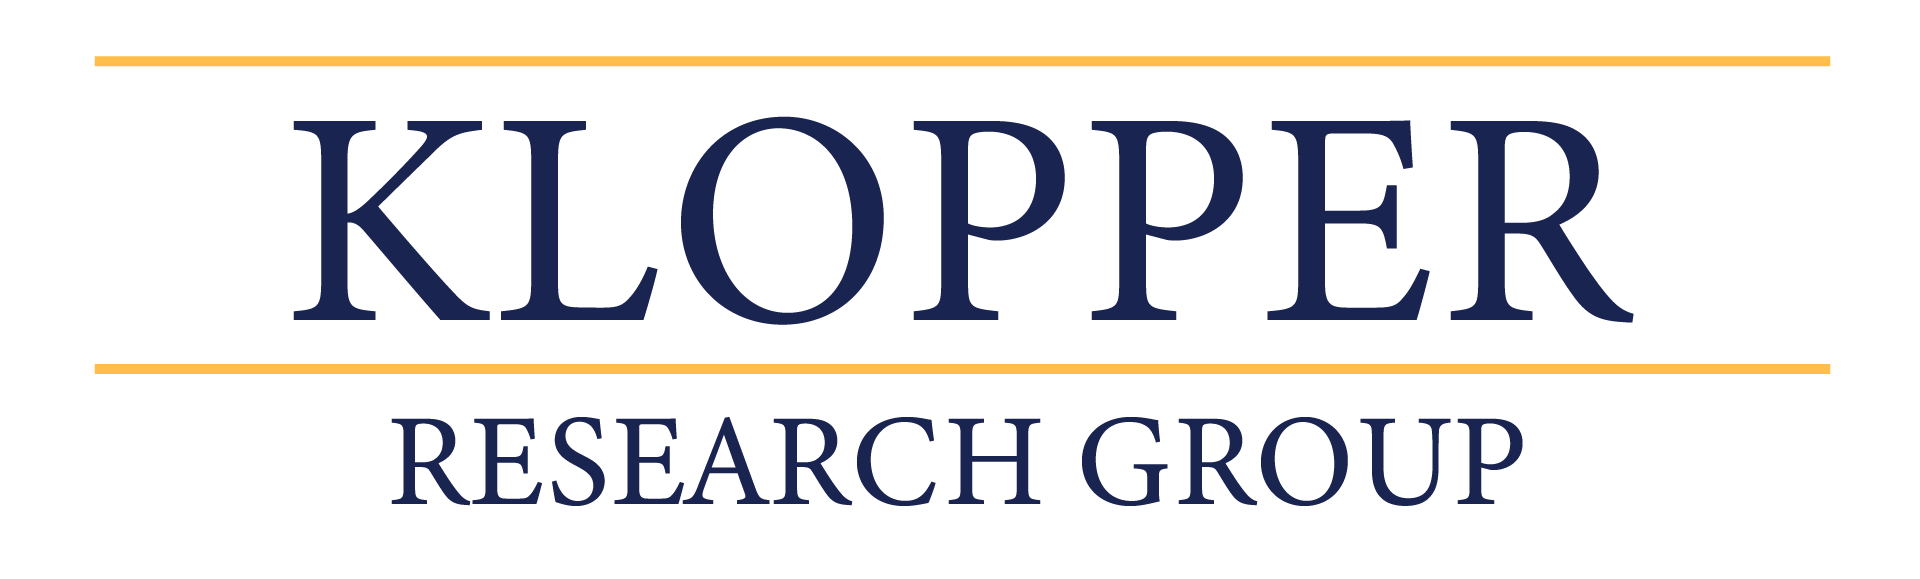

In [3]:
from IPython.display import Image
Image('KRG_elegant_logo_for_light_BG.png')

# Fun with algebra

## Preamble

In [4]:
from sympy import init_printing
init_printing()

## Simplifying algebraic expressions

The `sympy` package has a general function called `simplify()` which is great at simplifying algebraic expressions.

In [5]:
from sympy import symbols, simplify

In [6]:
x, y = symbols('x y')  # Creating more than one symbol

Let's simplify expression (1).

$$\frac{x^3 + x^2 - x + 1}{x^2 + 2x + 1} \tag{1}$$

In [7]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

We can factor both the numerator and the denominator using the `.factor()` method on each of the expresssions.

In [8]:
(x**3 + x**2 - x - 1).factor()  # Factoring the numerator

In [9]:
(x**2 + 2*x + 1).factor()  # Factoring the denominator

Now it's easy to see the result of the simplification as we ${\left( x+1 \right)}^2$ in both the numerator and the denominator.

Note that `simplify()` is a relatively slow function as it _tries_ many possible solutions.  When appropriate rather factor or expand.  We have already seen the power of the `factor()` and `expand()` functions and methods.

## Collect

The `collect()` function collects common powers.  Expression (2) has three mathematical variables with the $x$ variable being of varying degree.

$$x y + x - 3 + 2 x^2 - z x^2 + x^3 \tag{2}$$

We have to set `z` as a mathematical variable too.

In [10]:
z = symbols('z')  # Setting z as a mathematical variable

The `expr` computer variable is overwritten to contain expression (2).

In [11]:
expr = x * y - 2 + 2 * x**2 - z * x**2 + x**3
expr

The `collect()` function is imported from `sympy`.

In [12]:
from sympy import collect

Now we use the `collect()` function with two arguments.  The first is the computer variable that contains expression (2) and the second is the mathematical variable of interest.

In [13]:
collect(expr, x)

The results is an expression with descending powers of $x$.

## Cancel

The `cancel()` function puts a rational function in canonical form, i.e. $\frac{p}{q}$.  We will import the function and use it for expression (3).

In [14]:
((x-3)*(x+2)*(x-4)).expand()

In [15]:
((x-1)*(x-3)).expand()

$$\frac{x^3 - 5x^2 - 2x +24}{x^2 - 4x + 3} \tag{3}$$

In [16]:
from sympy import cancel

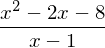

In [17]:
# Instead of first creating a computer variable we can pass the expression directly as an argument
cancel(((x - 3) * (x + 2) * (x - 4)) / ((x - 1)*(x - 3)))

The `.factor()` method will accomplish the same thing, other than also factoring the polynomials.

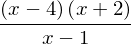

In [18]:
(((x - 3) * (x + 2) * (x - 4)) / ((x - 1)*(x - 3))).factor()

## Apart

The `apart()` function is especially helpful.  It calculates partial fraction decomposition.  This can take a long time if done by hand.  Take a look at expression (4) and then its (one possible) partial fraction decomposition.

$$\frac{3x^4 + 5x^3 - 3x^2 + 3x}{x^5 + 3x^4 - 9x - 27} \tag{4}$$

In [19]:
from sympy import apart

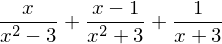

In [20]:
apart((1 / (x + 3)) + (x / (x**2 - 3)) + ((x - 1) / (x**2 + 3)))

## Trigonometric functions

The `sympy` package can both simplify and expand trigonometric function.  One of the most common trigonometric identity is shown in equation (5).

$${\left( \sin{\theta} \right)}^2 + {\left( \cos{\theta} \right)}^2 = 1 \tag{5}$$

First we have to learn how to create the mathematical variable $\theta$.  This is done using the same `symbol()` function that we are now familiar with.  First we have to create a computer variable to hold the symbol, just as we did with the mathematical symbol $x$ being held in the computer variable `x`, i.e. `x = symbols('x')`.  It is common just to use the written word for the Greek symbols.

The `symbols()` function recognizes special characters.  The Greek alphabet is included and hence we use the string `'theta'` as argument.

In [21]:
theta = symbols('theta')
theta

To show this identity in action, we use the `trigsimp()` function.

In [22]:
from sympy import trigsimp, sin, cos

In [23]:
# Expression
(sin(theta))**2 + (cos(theta))**2

In [24]:
# Trigonometric simplification
trigsimp((sin(theta))**2 + (cos(theta))**2)

Trigonometric expansion is just as easy with `expand_trig()`.  We will do this for the trigonometric identity in (6).

$$\sin( \theta + \phi ) = \sin(\phi) \cos(\theta) + \sin(\theta) \cos(\phi) \tag{6}$$

In [25]:
# Creating phi
phi = symbols('phi')
phi

In [26]:
from sympy import expand_trig

In [27]:
expand_trig(sin(theta + phi))

## Powers

The common properties of powers do not always hold.  In (7) below, are the common (non-exclusive) conditions for the properties of powers.

$$\begin{align}&x^a x^b = x^{a+b}, \forall a, b, x \in \mathbb{C} \\
&x^a y^a = \left( xy \right)^a, \forall x, y > 0, \forall a \in \mathbb{R} \\
&\left( x^a \right)^b = x^{ab}, \forall b \in \mathbb{Z} \end{align}  \tag{7}$$

The `sympy` package will only calculate powers when they are true in general.  By default all mathematical symbols in `sympy` are complex.  When mathematical symbols are declared with the `symbols()` function, we can specify their type, i.e. real or positive.

In [28]:
# Specifying the type of values that a mathematical symbol can hold
x, y = symbols('x y',
              positive = True)
a, b = symbols('a b',
              real = True)

Now we can use these mathematical symbols with the `powersimp()` function.  Below we import the function and look at the power properties.

In [29]:
from sympy import powsimp

In [30]:
expr = x**a * x**b  # Overwriting the computer variable expr
expr

In [31]:
powsimp(expr)

In [32]:
expr = x**a * y**a  # Overwriting the computer variable expr
expr

In [33]:
powsimp(expr)

In [34]:
expr = (x**a)**b  # Overwriting the computer variable expr
expr  # Automatically simplified

In [35]:
powsimp(expr)

When the the complex number values that variables can hold does not allow for the use of the properties of powers, the simplification is not performed.

In [36]:
m, n, c = symbols(' m n c')

In [37]:
expr = m**c * n**c  # Overwriting the computer variable expr
expr

In [38]:
powsimp(expr)

An example of this might be $m=n=-1, a = \frac{1}{2}$.
$$\begin{align} \left( -1 \right)^{\frac{1}{2}}\left( -1 \right)^{\frac{1}{2}} &= \left( -1 \times -1 \right)^{\frac{1}{1}} \\ i \cdot i &= 1^{\frac{1}{2}} \\ -1 &\ne \pm 1 \end{align}$$

The argument `force = True` can be added to the `powsimp()` function irrespective of having defined the type of mathematical variable.  This is useful if you know that you want to make the simplification an understand the mathematical constraints.

In [39]:
powsimp(expr,
       force = True)

Just as an aside, the square root function, `sqrt(x)` in `sympy` is actuall shorthand syntax for `x**Rational(1,2)`.

In [40]:
from sympy import sqrt, Rational

In [41]:
sqrt(x) == x**Rational(1, 2)

True

The `expand_power_exp()` and the `expand_power_base()` functions expand power expressions.

In [42]:
from sympy import expand_power_exp, expand_power_base

In expression (8) and (9) we expand using the properties of powers.  If these functions fail to expand the expression that you are working on, remember the mathematical constraints  or use the `force = True` argument.

$$x^{ a + b} \tag{8}$$

In [43]:
expand_power_exp(x**(a + b))

$$ \left( xy \right)^{a} \tag{9}$$

In [44]:
expand_power_base((x*y)**a)

## Logarithms

The `log()` function in `sympy` calculates the natural logarithm by default.  The latter uses Euler's number as base.  In general the properties shown in (10) below will hold for all positive real numbers and real exponents.

$$\begin{align} &\log{ x y } = \log{x} + \log{y} \\ &\log{x^n} = n \log{x}, \forall x, y \in \mathbb{R}, > 0 \end{align} \tag{10}$$

In [45]:
# Ovewrtiting the computer variable that hold the mathematical variables
# Specifying the values that each can hold
x, y = symbols('x y',
               positive = True)
n = symbols('n',
           real = True)

The `expand_log()` will expand expression according to the properties of logarithms given in (10) above.

In [46]:
from sympy import expand_log, log

In [47]:
expand_log(log(x * y))

In [48]:
expand_log(x**2)

Division of two positive real numbers, $\frac{x}{y}$, is simply a special case.

$$\begin{align} \log{\frac{x}{y}} &= \log{x \frac{1}{y}} \\ &= \log{x y^{-1}} \\ &= \log{x} + \log{y^{-1}} \\ &= \log{x} - \log{y} \end{align}$$

In [49]:
expand_log(log(x / y))

The `logcombine()` function will simplify our expression according to the properties in (10).

In [50]:
from sympy import logcombine

In [51]:
logcombine(log(x) + log(y))

In [52]:
logcombine(n * log(x))

## Binomial

The binomial coefficient function, `binomial()` calculates the number of ways to choose $k$ items from a set of $n$ distinct items, where order does not matter.

In [53]:
from sympy import binomial

We choose natural numbers as the binomial function pertains to discrete objects.

In [54]:
n, k = symbols('n k', positive = True, integer = True)

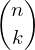

In [55]:
binomial(n, k)

We can substitute values using the `.evalf()` method.

In [56]:
binomial(n, k).evalf(subs = {n:4, k:2})